# 1. Introduction to Qiskit 

In [1]:
# setting it up

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
import My_Qiskit_Functions as MQ
import numpy as np
import math as m
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
# generating a simple state

q = QuantumRegister(1)
hello_qubit = QuantumCircuit(q)

#hello_qubit.iden(q[0])

job = execute(hello_qubit, S_simulator)
result = job.result()
result.get_statevector()

array([1.+0.j, 0.+0.j])

In [3]:
# looking at object types

print('simulator: ', S_simulator, '\n')
print('simulator type: ', type(S_simulator),'\n')
print('Aer.backend(name=statevector_simulator): ',Aer.backends(name='statevector_simulator'))

simulator:  statevector_simulator 

simulator type:  <class 'qiskit.providers.aer.backends.statevector_simulator.StatevectorSimulator'> 

Aer.backend(name=statevector_simulator):  [<StatevectorSimulator('statevector_simulator') from AerProvider()>]


In [4]:
# again, generating easy states

q = QuantumRegister(3)
three_qubits = QuantumCircuit(q)

three_qubits.x(q[0])

job = execute(three_qubits, S_simulator)
result = job.result()
result.get_statevector()

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [7]:
# use the customized Wavefunction() to print things in kets

q = QuantumRegister(2)
H_circuit = QuantumCircuit(q)

H_circuit.h(q[0])
H_circuit.h(q[1])

MQ.Wavefunction(H_circuit)

0.5 |00>   0.5 |01>   0.5 |10>   0.5 |11>   


In [13]:
# making measurements and looking at counts

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.measure(q,c)

job = execute(qc, M_simulator)
result = job.result()
result.get_counts(qc)

{'0': 505, '1': 519}

In [16]:
# more measurements, on the entire system

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.h(q[1])
# full measurement
qc.measure(q,c)

M = execute(qc, M_simulator).result().get_counts(qc)
#print('Dictionary entroy "0": ', M['0'])
#print('Dictionary entroy "0": ', M['1'])

print(M)

{'00': 258, '11': 257, '01': 235, '10': 274}


In [17]:
# partial measurements only

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.h(q[1])
# partial  measurement
qc.measure(q[0],c[0])

M = execute(qc, M_simulator).result().get_counts(qc)
#print('Dictionary entroy "0": ', M['0'])
#print('Dictionary entroy "0": ', M['1'])


# note that qubit 0 sits at the bottom
print(M)

{'00': 489, '01': 535}


In [18]:
# more measurements

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#qc.h(q[0])
qc.x(q[1])
qc.measure(q,c)

M = execute(qc, M_simulator).result().get_counts(qc)
#print('Dictionary entroy "0": ', M['0'])
#print('Dictionary entroy "0": ', M['1'])


# note here that qubit 0 sits on the right
print(M)

{'10': 1024}


In [21]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])

MQ.Wavefunction(qc)

0.70711 |00>   0.70711 |10>   


In [22]:
# summarizing quantum circuit for IBM Q Exp

q = QuantumRegister(3)
c = ClassicalRegister(3)
super0 = QuantumCircuit(q,c)

super0.h(q[0])
super0.measure(q[0],c[0])

# prints out quantum ciruit, which can be copy-pasted onto IBM Q Exp
print(super0.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q19[3];
creg c11[3];
h q19[0];
measure q19[0] -> c11[0];



In [23]:
# extracting information from Quantum Circuit

q = QuantumRegister(2,name='q')
c = ClassicalRegister(3,name='c')
two_q = QuantumCircuit(q,c,name='qc')

two_q.h(q[0])
two_q.h(q[1])

# measure only qubit 0
two_q.measure(q[0],c[0])

print('___QuantumCircuit.qasm()___')
print(two_q.qasm())
print('___QuantumCircuit.data___')
print(two_q.data)
print('\n___QuantumCircuit.qregs___')
print(two_q.qregs)
print('\n___QuantumCircuit.cregs___')
print(two_q.cregs)

___QuantumCircuit.qasm()___
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[3];
h q[0];
h q[1];
measure q[0] -> c[0];

___QuantumCircuit.data___
[(<qiskit.circuit.library.standard_gates.h.HGate object at 0x000001B9269633C8>, [Qubit(QuantumRegister(2, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x000001B926963508>, [Qubit(QuantumRegister(2, 'q'), 1)], []), (<qiskit.circuit.measure.Measure object at 0x000001B926963488>, [Qubit(QuantumRegister(2, 'q'), 0)], [Clbit(ClassicalRegister(3, 'c'), 0)])]

___QuantumCircuit.qregs___
[QuantumRegister(2, 'q')]

___QuantumCircuit.cregs___
[ClassicalRegister(3, 'c')]


     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c_0: ══════╩══╬═
              ║ 
c_1: ═════════╩═
                


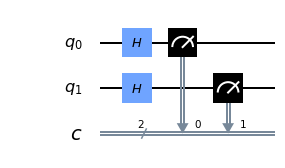

In [36]:
# visualizing circuits

q = QuantumRegister(2,name='q')
c = ClassicalRegister(2,name='c')
qc = QuantumCircuit(q,c,name='qc')

qc.h(q[0])
qc.h(q[1])
qc.measure(q,c)

# two ways to draw quantum circuit in ASCII

qc.draw()
print(qc)

# can also draw in mathplotlib or latex...

qc.draw(output='mpl') # matplotlib

# or  in latex
#qc.draw(output='latex') # in latex

In [2]:
# now, learning how to use gates

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
import My_Qiskit_Functions as MQ
import math as m
import numpy as np
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

1.0 |0>   


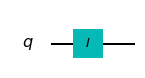

In [2]:
# Identity operator

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.id(q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

0.70711 |0>   0.70711 |1>   


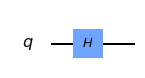

In [44]:
# Hadamard operator

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

1.0 |1>   


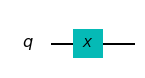

In [45]:
# Pauli-X operator

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.x(q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

1.0j |1>   


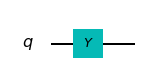

In [46]:
# Pauli-Y operator

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.y(q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

1.0 |0>   


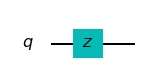

In [47]:
# Pauli-Z operator

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.z(q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

0.70711 |0>   0.5+0.5j |1>   


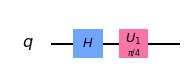

In [53]:
# Phase gate 

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.u1( m.pi/4  ,q[0]) # phase gate, with specific value
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

In [54]:
# QUESTION: how do we implement these gates symbolically?

0.61237-0.35355j |0>   0.61237-0.35355j |1>   


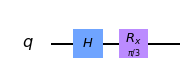

In [56]:
# X-Rotation 

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.rx( m.pi/3, q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

0.25882 |0>   0.96593 |1>   


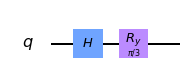

In [58]:
# Y-Rotation 

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.ry( m.pi/3, q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

0.70711 |0>   0.35355+0.61237j |1>   


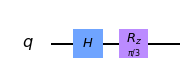

In [59]:
# Z-Rotation 

q = QuantumRegister(1,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.rz( m.pi/3, q[0])
MQ.Wavefunction(I_qc)

circuit_drawer(I_qc)

I_qc.draw('mpl')

0.70711 |00>   -0.70711 |11>   


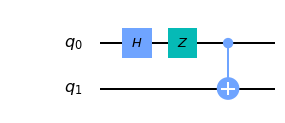

In [61]:
# CNOT

q = QuantumRegister(2,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.z(q[0])
I_qc.cx(q[0], q[1])   # control, target


MQ.Wavefunction(I_qc)
circuit_drawer(I_qc)
I_qc.draw('mpl')

0.70711 |00>   -0.70711 |01>   


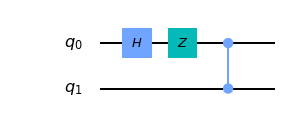

In [62]:
# CZ

q = QuantumRegister(2,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.z(q[0])
I_qc.cz(q[0], q[1])   # control, target


MQ.Wavefunction(I_qc)
circuit_drawer(I_qc)
I_qc.draw('mpl')

0.70711 |00>   -0.70711 |01>   


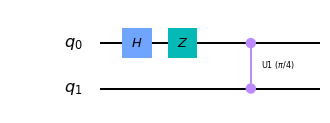

In [63]:
# CPhase

q = QuantumRegister(2,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.z(q[0])
I_qc.cu1(m.pi/4, q[0], q[1])   # control, target


MQ.Wavefunction(I_qc)
circuit_drawer(I_qc)
I_qc.draw('mpl')

0.70711 |00>   -0.70711 |10>   


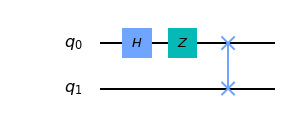

In [64]:
# SWAP

q = QuantumRegister(2,name='q')
I_qc = QuantumCircuit(q,name='qc')

I_qc.h(q[0])
I_qc.z(q[0])
I_qc.swap(q[0], q[1])   # control, target


MQ.Wavefunction(I_qc)
circuit_drawer(I_qc)
I_qc.draw('mpl')

In [65]:
# comparison between get_statevector and wavefunction

q = QuantumRegister(2,name='q')
qc = QuantumCircuit(q,name='qc')

qc.h(q[1])
qc.z(q[1])

# print statevector
print(execute(qc,S_simulator).result().get_statevector())

# print wavefunction
MQ.Wavefunction(qc)

# note that the convention is correct
# the convention of the original code in the pape is NOT!

[ 0.70710678+0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]
0.70711 |00>   -0.70711 |10>   


In [68]:
# can also increase in precision with wavefunction:

q = QuantumRegister(2,name='q')
qc = QuantumCircuit(q,name='qc')

qc.h(q[1])
qc.z(q[1])

MQ.Wavefunction(qc, precision=10)  # nice!

0.7071067812 |00>   -0.7071067812 |10>   


In [70]:
# there's a nicer way to print out the wavefunction -- in a column!

q = QuantumRegister(4, name='q')
qc = QuantumCircuit(q, name = 'qc')

qc.h(q[0])
qc.h(q[1])
qc.z(q[1])
qc.rx(m.pi/3,q[1])
qc.h(q[2])
qc.ry(m.pi/5, q[2])
qc.h(q[3])

MQ.Wavefunction(qc)

print('\n___Column___')
MQ.Wavefunction(qc, column=True)

0.13901+0.08025j |0000>   0.13901+0.08025j |0001>   -0.13901-0.08025j |0010>   -0.13901-0.08025j |0011>   0.27281+0.15751j |0100>   0.27281+0.15751j |0101>   -0.27281-0.15751j |0110>   -0.27281-0.15751j |0111>   0.13901+0.08025j |1000>   0.13901+0.08025j |1001>   -0.13901-0.08025j |1010>   -0.13901-0.08025j |1011>   0.27281+0.15751j |1100>   0.27281+0.15751j |1101>   -0.27281-0.15751j |1110>   -0.27281-0.15751j |1111>   

___Column___
0.13901+0.08025j |0000>   
0.13901+0.08025j |0001>   
-0.13901-0.08025j |0010>   
-0.13901-0.08025j |0011>   
0.27281+0.15751j |0100>   
0.27281+0.15751j |0101>   
-0.27281-0.15751j |0110>   
-0.27281-0.15751j |0111>   
0.13901+0.08025j |1000>   
0.13901+0.08025j |1001>   
-0.13901-0.08025j |1010>   
-0.13901-0.08025j |1011>   
0.27281+0.15751j |1100>   
0.27281+0.15751j |1101>   
-0.27281-0.15751j |1110>   
-0.27281-0.15751j |1111>   



In [2]:
# Suppose we have ancilla qubits, which make up a seconary system
# Systems and Show_systems 

q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q,name='qc')

qc.h(q[0])
qc.h(q[2])

MQ.Wavefunction(qc)


MQ.Wavefunction(qc, systems=[2,1])

0.5 |000>   0.5 |001>   0.5 |100>   0.5 |101>   
0.5 |00>|0>   0.5 |00>|1>   0.5 |10>|0>   0.5 |10>|1>   


In [4]:
# suppose we have groups of ancilla qubits which we don't want to show....
# Use show_systems to choose whcih systems we want to view:

q = QuantumRegister(6,name='q')
qc = QuantumCircuit(q,name='qc')

qc.h(q[0])
qc.h(q[2])

# show |..>|.>|...|
MQ.Wavefunction(qc, systems = [2,1,3])

# show only the last group:
MQ.Wavefunction(qc, systems = [2,1,3], show_systems=[True,True,False])



0.5 |00>|0>|000>   0.5 |00>|0>|001>   0.5 |00>|0>|100>   0.5 |00>|0>|101>   
0.5 |00>|0>   0.5 |00>|0>   0.5 |00>|0>   0.5 |00>|0>   


## 2. Generating GHZ states with Cluster States

With this background, we can try playing around with cluster state quantum computations. First, let's consider a simple system of 4 qubits $\otimes|+\rangle$ entangled in a ring configuration.

{'00': 485, '11': 539}
0.70711 |0>|1>|1>|1>   
0.70711 |1>|1>|0>|1>   



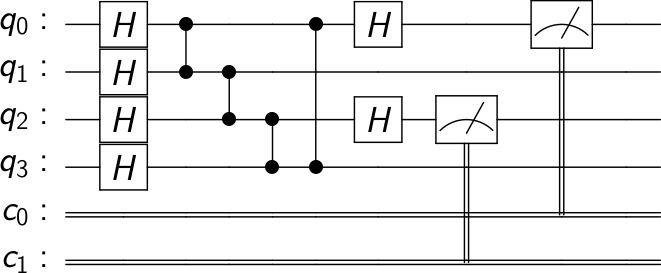

In [5]:
# Now, try to set up a cluster state with 4 qubits in a ring configuration:

q = QuantumRegister(4,name='q')
c = ClassicalRegister(2,name='c')
qc = QuantumCircuit(q,c,name='qc')


# first, initialize everything to get |+> product state:
for i in range(4):
    qc.h(q[i])

# entangle with Cz
qc.cz(q[0],q[1])
qc.cz(q[1],q[2])
qc.cz(q[2],q[3])
qc.cz(q[3],q[0])

# Hadamard qubits 0 and 2, to measure in X basis:
''' 
    Note here that since there is no way to measure in the X basis,
    we have to first map |0> --> |+> and |1> --> |-> using the Hadamard
    in order to simulate the measurement in the X basis.
    
    Note further that once measurement is complete, 
    we simply ignore the measured qubit.
    
    e.g. once we apply H to the 0-qubit and the outcome is |0000> + |0010>,
    this actually corresponds to the state (|000> + |001>)|+>.
    
    ==> applying H is a matter of re-interpreting a subsystem...
    ==> just be careful!!!
'''
qc.h(q[0])
qc.measure(q[0],c[0])
qc.h(q[2])
qc.measure(q[2],c[1])

print(execute(qc, M_simulator).result().get_counts(qc))


MQ.Wavefunction(qc,column=True,systems=[1,1,1,1])

qc.draw('latex')


# there are two outcomes:
# --> either 0 and 2 are in state 00 (correspond to ++ without HH)
#     ---> in this case 1 and 3 are in 00 + 11
# --> or 0 an 2 are in state 11 (correspond to -- without HH)
#     ---> in this case 1 and 3 are in 01 + 10

# CONVENTION: whenever a subsystem needs re-interpretation, should write in separate ket!

Works great! Now, consider a slightly larger configuration: 6 qubits $|+\rangle$ on a ring (connected with $Cz$ gates). The goal of this computation is to show that the outcome is a state that at most a Pauli factor from the GHZ state. 

In [1]:
# Now, try to set up a cluster state with 6 qubits.
# GOAL: create the GHZ state, just as in the 4-qubit example.

q = QuantumRegister(6,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')


# first, initialize everything to get |+> product state:
for i in range(6):
    qc.h(q[i])

# entangle with Cz
qc.cz(q[0],q[1])
qc.cz(q[1],q[2])
qc.cz(q[2],q[3])
qc.cz(q[3],q[4])
qc.cz(q[4],q[5])
qc.cz(q[5],q[0])

# Hadamard qubits 0,2,4, to measure in X basis:
qc.h(q[0])
qc.h(q[2])
qc.h(q[4])
qc.measure(q[0],c[0])
qc.measure(q[2],c[1])
qc.measure(q[4],c[2])

print(execute(qc, M_simulator).result().get_counts(qc))


MQ.Wavefunction(qc,column=True,systems=[1,1,1,1,1,1])

qc.draw('mpl')


# there are two outcomes:
# --> either 0 and 2 are in state 00 (correspond to ++ without HH)
#     ---> in this case 1 and 3 are in 00 + 11
# --> or 0 an 2 are in state 11 (correspond to -- without HH)
#     ---> in this case 1 and 3 are in 01 + 10

NameError: name 'QuantumRegister' is not defined

Indeed, the measurement outcomes turn out to be the set $\{ |+++\rangle, |+--\rangle, |-+-\rangle, |--+\rangle \}$, which we note have $\prod X_i = 1$. The remaining states obey the $\prod X_i$ symmetry, i.e., are invariant under $\prod X_i$. Running the computation a few times, we can see that all the possible outcomes are 
$$
|\psi\rangle_{531} = \frac{1}{\sqrt{2}}(|000 \rangle + |111 \rangle )\\ 
|\psi\rangle_{531} = \frac{1}{\sqrt{2}}(|011 \rangle + |100 \rangle ) \\ 
|\psi\rangle_{531} = \frac{1}{\sqrt{2}}(|001 \rangle + |110 \rangle )\\ 
|\psi\rangle_{531} = \frac{1}{\sqrt{2}}(|010 \rangle + |101 \rangle )
$$

Obviously, the output states are at worst only a single $X_i$ factor from the GHZ state, which is good! With this, let us consider a slightly larger system, with 8 qubits on a ring and convince ourselves that the GHZ state can be generated this way.

{'1001': 112, '1100': 137, '0000': 115, '1010': 136, '0101': 137, '0011': 123, '1111': 124, '0110': 140}
0.70711 |0>|0>|0>|1>|1>|0>|1>|1>   
0.70711 |1>|0>|1>|1>|0>|0>|0>|1>   



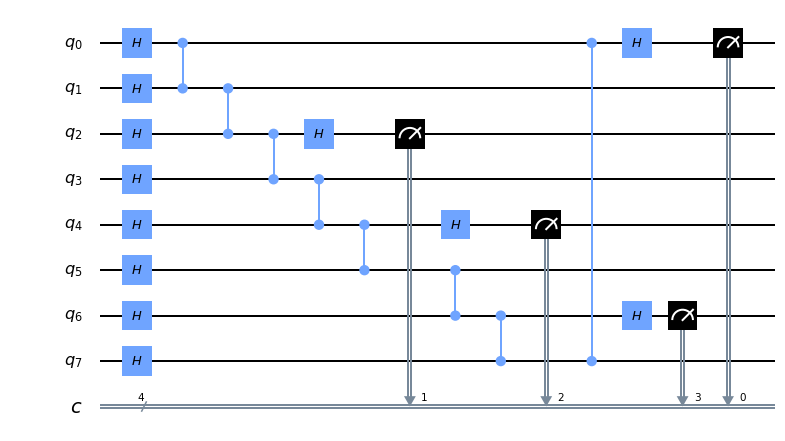

In [74]:
# Now, try to set up a cluster state with 8 qubits.
# GOAL: create the GHZ state, just as in the 4-qubit example.

q = QuantumRegister(8,name='q')
c = ClassicalRegister(4,name='c')
qc = QuantumCircuit(q,c,name='qc')


# first, initialize everything to get |+> product state:
for i in range(8):
    qc.h(q[i])

# entangle with Cz
qc.cz(q[0],q[1])
qc.cz(q[1],q[2])
qc.cz(q[2],q[3])
qc.cz(q[3],q[4])
qc.cz(q[4],q[5])
qc.cz(q[5],q[6])
qc.cz(q[6],q[7])
qc.cz(q[7],q[0])

# Hadamard qubits 0,2,4, to measure in X basis:
qc.h(q[0])
qc.h(q[2])
qc.h(q[4])
qc.h(q[6])
qc.measure(q[0],c[0])
qc.measure(q[2],c[1])
qc.measure(q[4],c[2])
qc.measure(q[6],c[3])


print(execute(qc, M_simulator).result().get_counts(qc))


MQ.Wavefunction(qc,column=True,systems=[1,1,1,1,1,1,1,1])
qc.draw('mpl')

It is easy to see (after running a few computations) that the possible output states are:
$$
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0000 \rangle + | 1111 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0001 \rangle + | 1110 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0010 \rangle + | 1101 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0011 \rangle + | 1100 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0100 \rangle + | 1011 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0101 \rangle + | 1010 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0110 \rangle + | 1001 \rangle) \\
| \psi \rangle_{7531} = \frac{1}{\sqrt{2}}(| 0111 \rangle + | 1000 \rangle)
$$

In any case, I think that is a good enough demonstration of the generation of the GHZ states.

# 3. Exploration: Grid-like cluster states

We ask whether adding more entanglement to the initial state gives us more insight. Obviously, 4 qubits on a ring is the smallest possible grid we can make. Thus, let us start with 6 qubits on a ring, plus $Cz$-ing between $(ij)$ where $i+j=5$. In other words, not only do we have the ring-like configuration, we also apply the $Cz$ gate to the following pairs of qubits $(05),(14),(23)$. In this case, note that because $(05)$ and $(23)$ are already connected in the ring, we only apply an extra connection between $1$ and $4$.

{'010': 1291, '000': 1226, '001': 1281, '101': 1223, '011': 1241, '111': 1207, '110': 1258, '100': 1273}
1.0 |1>|1>|1>|0>|1>|0>   



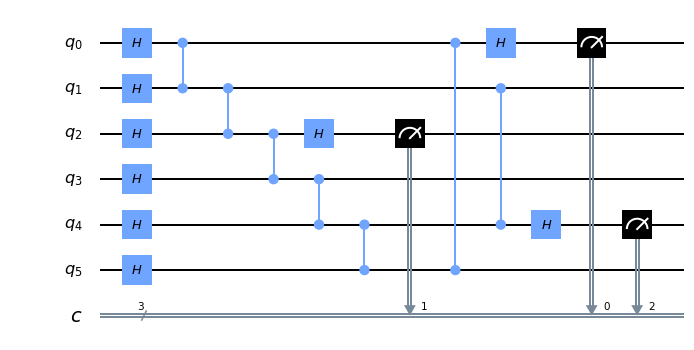

In [127]:
# Now, try to set up a cluster state with 6 qubits.
# GOAL: explore what happens when we add more entanglement to the ring configuration:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer,BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
import My_Qiskit_Functions as MQ
import math as m
import numpy as np
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

q = QuantumRegister(6,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')


# first, initialize everything to get |+> product state:
for i in range(6):
    qc.h(q[i])

# entangle with Cz to make a ring
qc.cz(q[0],q[1])
qc.cz(q[1],q[2])
qc.cz(q[2],q[3])
qc.cz(q[3],q[4])
qc.cz(q[4],q[5])
qc.cz(q[5],q[0])
# entangle with Cz across the ring
qc.cz(q[1],q[4])

# Hadamard qubits 0,2,4, to measure in X basis:
qc.h(q[0])
qc.h(q[2])
qc.h(q[4])
qc.measure(q[0],c[0])
qc.measure(q[2],c[1])
qc.measure(q[4],c[2])


print(execute(qc, M_simulator, shots = 10000).result().get_counts(qc))
MQ.Wavefunction(qc,column=True,systems=[1,1,1,1,1,1])
qc.draw('mpl')

Aha! Note that we get a product state. This means a criss-cross measurement pattern on configurations like these are not worth considering. We conclude that perhaps the ring configuration is the most useful and thus we will focus on it from now on. 

# 4. Printing Histogram 

In this section, we look at how print a histogram of measurement outcomes. This might be useful in the future. I will re-use the code from the 6-qubit on a ring exploration to demonstrate how the histogram works. 

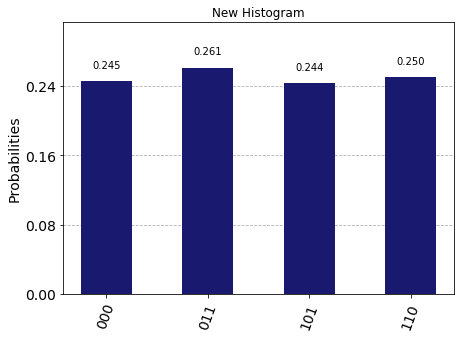

In [109]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer,BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
import My_Qiskit_Functions as MQ
import math as m
import numpy as np
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

q = QuantumRegister(6,name='q')
c = ClassicalRegister(3,name='c')
qc = QuantumCircuit(q,c,name='qc')

# first, initialize everything to get |+> product state:
for i in range(6):
    qc.h(q[i])

# entangle with Cz
qc.cz(q[0],q[1])
qc.cz(q[1],q[2])
qc.cz(q[2],q[3])
qc.cz(q[3],q[4])
qc.cz(q[4],q[5])
qc.cz(q[5],q[0])

# Hadamard qubits 0,2,4, to measure in X basis:
qc.h(q[0])
qc.h(q[2])
qc.h(q[4])
qc.measure(q[0],c[0])
qc.measure(q[2],c[1])
qc.measure(q[4],c[2])

#MQ.Wavefunction(qc,column=True,systems=[1,1,1,1,1,1])

qc.draw('mpl')
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)
plot_histogram(job.result().get_counts(), color='midnightblue', title="New Histogram")

Recall that we need to re-interpret the outcomes as the state $|+++\rangle, |+--\rangle, |-+-\rangle, |--+\rangle$. It turns out that these states appear with equal probability. Now, to explore what states the other qubits acquire, we must turn off the histogram function and run the code the old way. 

While this might pose some inconvenience, it's useful to know we can do this. 

# 5. Symbolic Gates

In this section, we try to implement gates (rotations, especially) with an arbitrary parameter. To this end, we import "Parameter" from qiskit.circuit and SymPy.

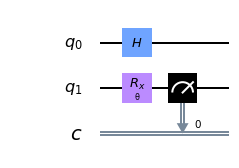

In [135]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer,BasicAer
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
import My_Qiskit_Functions as MQ
import math as m
import numpy as np
import sympy as sy
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]


q = QuantumRegister(2,name='q')
c = ClassicalRegister(1,name='c')
qc = QuantumCircuit(q,c,name='qc')

phase=Parameter('θ')

qc.h(q[0])
qc.rx((phase),q[1])
qc.measure(q[1],c[0])

#print(execute(qc, M_simulator, shots = 10000).result().get_counts(qc))
#MQ.Wavefunction(qc,column=True,systems=[1,1,1,1,1,1])
qc.draw('mpl')

It turns out that we can only go so far as to draw out the circuit diagram with an arbitrary parameter. If we want to do calculations, we will need to assign to parameters numerical values. This is sad, but at least being able to draw out diagrams  for visualizations might be good enough. 

# 6. Creating quantum states from GHZ?

In this section, we consider the following idea: Suppose we want to create some critical ground state (of the 1D TFIM model) with 4 qubits. It is known that the 4-qubit GHZ state is roughly as "far" from the critical 4-qubit ground state as the paramagnetic $\otimes | + \rangle$ state. Here, the states are "far" from the critical ground state in the sense that the time (or, equivalently, the circuit depth) it takes to reach the critical ground state increases linearly in the system size.

In this section, we test the following idea. In order to get to the 4-qubit state faster than linear, we will want the circuit depth to increase only LOGARITHMICALLY in the system size. To this end, we might want to consider the following trade-off from QAOA. We know from QAOA that each layer is parameterized by only 2 parameters (and in fact, adding more parameters per layer does not help -- the number of layers is still going to be linear in system size). Thus, QAOA is effectively restricted to applying a uniform transformation to every qubit in the system per layer. On the other hand, when measurements are introduced, we can also spread correlations very rapily throughout the system. This, combined with the aid of local unitaries, might be able to help us fully parameterize and move the state to the ground state in log time. 

The way this might be done is the following. In contrast to QAOA where the system size does not change and entanglement is introduced pair-by-pair by the (uniform) application of the $e^{i\beta \sum Z_iZ_j}$ at each layer, our new procedure relies on measuring a GHZ state of a larger size, followed by applications of non-uniform local unitaries (such as $X$-rotations and $e^{i\beta ZZ}$ gates) -- here "non-uniform" means we can have many more parameters per layer than QAOA (which only has 2 per layer). By subsequent applications of measurements (which shrink the system size and possibly carry entanglements) and local unitaries (through which we introduce various parameters), we might be able to reach the ground state of the desired size in log time. 

Obviously, since each layer of the above strategy is defined in terms of a "layer of measurement" (which halves the system size everytime), we should try to see whether a logarithmic (in system size) number of layers suffices.

To start, consider the trivial problem of preparing the critical ground state of a 2-site TFIM. (to be continued)